# Mount Google Drive and Import Dataset from the drive

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip the Dataset from drive to the colab content directory
!unzip /content/drive/MyDrive/STUDY/MSc/Assignment/CNN_assignment.zip

Archive:  /content/drive/MyDrive/STUDY/MSc/Assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_00247

# Import Libraries

In [4]:
# Import all the libraries
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
import shutil
!pip install Augmentor
import Augmentor

# Data Reading and Data Visualization

Few train images:


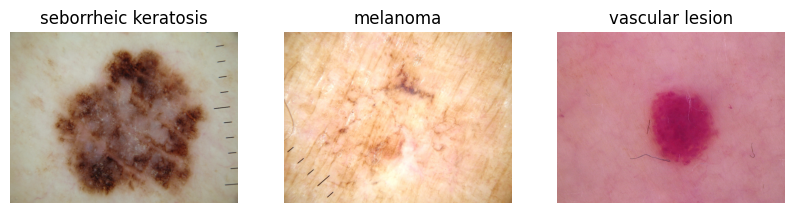

Few test images:


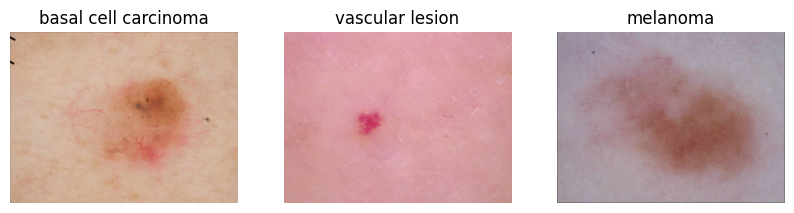

In [5]:
# Define the root dataset directory
dataset_root = "/content/Skin cancer ISIC The International Skin Imaging Collaboration"

# Define the paths to the train and test directories
train_dir = os.path.join(dataset_root, "Train")
test_dir = os.path.join(dataset_root, "Test")

# Random data visualization
def train_test_visualization(directory, num_images=3):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        class_name = random.choice(os.listdir(directory))
        class_dir = os.path.join(directory, class_name)
        image_name = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_name)
        image = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

print("Few train images:")
train_test_visualization(train_dir)

print("Few test images:")
train_test_visualization(test_dir)


# Data Preprocessing

In [6]:
# Define constants
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32
SEED = 42
VALIDATION_SPLIT = 0.2

# Create ImageDataGenerator for train data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for validation data (only rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# Create train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

# Create validation generator
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


# Model Creation

In [7]:
# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
model = create_model(input_shape=(180, 180, 3), num_classes=9)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

# Model Training

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/20
56/56 [==============================] - 44s 671ms/step - loss: 2.0172 - accuracy: 0.2598 - val_loss: 2.1204 - val_accuracy: 0.2428
Epoch 2/20
56/56 [==============================] - 39s 667ms/step - loss: 1.7118 - accuracy: 0.4095 - val_loss: 1.7744 - val_accuracy: 0.4231
Epoch 3/20
56/56 [==============================] - 40s 721ms/step - loss: 1.6343 - accuracy: 0.4254 - val_loss: 1.7916 - val_accuracy: 0.4111
Epoch 4/20
56/56 [==============================] - 33s 594ms/step - loss: 1.4506 - accuracy: 0.4957 - val_loss: 1.9208 - val_accuracy: 0.4111
Epoch 5/20
56/56 [==============================] - 42s 746ms/step - loss: 1.4371 - accuracy: 0.4974 - val_loss: 2.0240 - val_accuracy: 0.4159
Epoch 6/20
56/56 [==============================] - 42s 754ms/step - loss: 1.4552 - accuracy: 0.4963 - val_loss: 1.8488 - val_accuracy: 0.4399
Epoch 7/20
56/56 [==============================] - 33s 595ms/step - loss: 1.3763 - accuracy: 0.5162 - val_loss: 1.7228 - val_accuracy: 0.4399

# Model Evaluation

14/14 [==============================] - 4s 323ms/step - loss: 1.9729 - accuracy: 0.4662
Validation Accuracy: 0.47


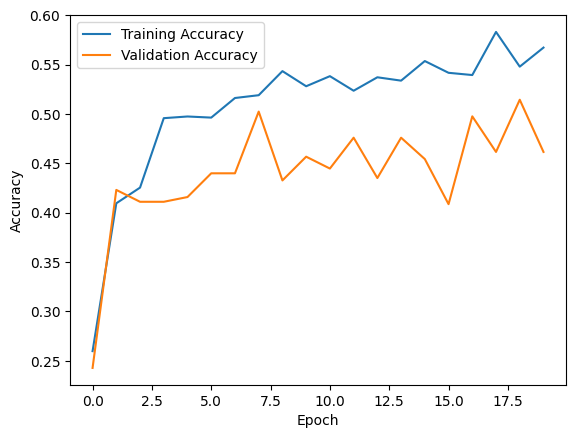

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Training and Evaluation with Basic Data Augmentation

Model Training

In [ ]:
# Define ImageDataGenerator for data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create augmented train generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Create the model
model_augmented = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_augmented.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model with augmented data
history_augmented = model_augmented.fit(train_generator_augmented,
                                        steps_per_epoch=train_generator_augmented.samples // 32,
                                        epochs=20,
                                        validation_data=validation_generator,
                                        validation_steps=validation_generator.samples // 32)


Found 2239 images belonging to 9 classes.
Epoch 1/20
69/69 [==============================] - 43s 601ms/step - loss: 2.0339 - accuracy: 0.2356 - val_loss: 2.0230 - val_accuracy: 0.2692
Epoch 2/20
69/69 [==============================] - 40s 585ms/step - loss: 1.8366 - accuracy: 0.3213 - val_loss: 1.7512 - val_accuracy: 0.3413
Epoch 3/20
69/69 [==============================] - 40s 575ms/step - loss: 1.6280 - accuracy: 0.4082 - val_loss: 1.5524 - val_accuracy: 0.4399
Epoch 4/20
69/69 [==============================] - 39s 574ms/step - loss: 1.5328 - accuracy: 0.4459 - val_loss: 1.7039 - val_accuracy: 0.4231
Epoch 5/20
69/69 [==============================] - 40s 578ms/step - loss: 1.5301 - accuracy: 0.4545 - val_loss: 1.3902 - val_accuracy: 0.5024
Epoch 6/20
 1/69 [..............................] - ETA: 29s - loss: 1.2677 - accuracy: 0.5938

Model Evaluation

In [ ]:
# Evaluate the augmented model
loss_augmented, accuracy_augmented = model_augmented.evaluate(validation_generator)
print(f"Validation Accuracy with Data Augmentation: {accuracy_augmented:.2f}")

# Plot training history
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

But, still the performance doesn't seems to be better!<br>
Let's try some other method of Augmentation using Augmentor

# Data Augmentation using Augmentor

In [ ]:
# Define a function to create an Augmentor pipeline
def create_augmentor_pipeline(input_dir, output_dir, num_samples):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize Augmentor pipeline
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)

    # Define augmentation operations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

    # Sample images
    p.sample(num_samples)

# Define directories for augmented data
augmented_train_dir = "/content/AugmentedData/Train"

# Remove augmented_train_dir if it already exists
if os.path.exists(augmented_train_dir):
    shutil.rmtree(augmented_train_dir)

# Create Augmentor pipeline for data augmentation
create_augmentor_pipeline(train_dir, augmented_train_dir, num_samples=5000)


Model Training after Augmentation using Augmentor

In [ ]:
# Create ImageDataGenerator for augmented train data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    # Since we already did Augmentation using Augmentator, we won't generate any augmented data
)

# Create augmented train generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    augmented_train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Rebuild the model
model_augmented = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_augmented.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model on augmented data
history_augmented = model_augmented.fit(train_generator_augmented,
                                        steps_per_epoch=train_generator_augmented.samples // 32,
                                        epochs=20,
                                        validation_data=validation_generator,
                                        validation_steps=validation_generator.samples // 32)


Model Evaluation after Data Augmentation using Augmentor

In [ ]:
# Evaluate the model
loss_augmented, accuracy_augmented = model_augmented.evaluate(validation_generator)
print(f"Validation Accuracy with Augmented Data: {accuracy_augmented:.2f}")

# Plot training history
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Class distribution

In [ ]:
# Function to get class distribution
def get_class_distribution(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Get class distribution for training dataset
train_class_distribution = get_class_distribution(augmented_train_dir)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


From above graph we can clearly see:
- **`seborrheic keratosis`** have least number of samples
- **`melanoma`** dominate the dataset

# Handling class imbalances

In [ ]:
# Define the number of samples each balanced class should have
desired_samples = 1000

# Define directories for balanced training data
balanced_train_dir = "/content/BalancedData/Train"

# Remove balanced_train_dir if it already exists
if os.path.exists(balanced_train_dir):
    shutil.rmtree(balanced_train_dir)

# Create balanced dataset using Augmentor
for class_name, num_samples in train_class_distribution.items():
    input_dir = os.path.join(augmented_train_dir, class_name) # We are using the latest train dataset(Augmented train data)
    output_dir = os.path.join(balanced_train_dir, class_name)
    create_augmentor_pipeline(input_dir, output_dir, desired_samples)

Initialised with 427 image(s) found.
Output directory set to /BalancedData/Train/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B05005D76A0>: 100%|██████████| 1000/1000 [00:46<00:00, 21.48 Samples/s]


Initialised with 160 image(s) found.
Output directory set to /BalancedData/Train/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B0500513C40>: 100%|██████████| 1000/1000 [02:06<00:00,  7.92 Samples/s]


Initialised with 832 image(s) found.
Output directory set to /BalancedData/Train/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056C329810>: 100%|██████████| 1000/1000 [00:50<00:00, 19.84 Samples/s]


Initialised with 775 image(s) found.
Output directory set to /BalancedData/Train/nevus.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B056F742E30>: 100%|██████████| 1000/1000 [03:56<00:00,  4.23 Samples/s]


Initialised with 254 image(s) found.
Output directory set to /BalancedData/Train/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B05606BCC40>: 100%|██████████| 1000/1000 [00:45<00:00, 21.76 Samples/s]


Initialised with 322 image(s) found.
Output directory set to /BalancedData/Train/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B051B98BE20>: 100%|██████████| 1000/1000 [00:44<00:00, 22.25 Samples/s]


Initialised with 995 image(s) found.
Output directory set to /BalancedData/Train/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B056C2E2C50>: 100%|██████████| 1000/1000 [00:44<00:00, 22.49 Samples/s]


Initialised with 201 image(s) found.
Output directory set to /BalancedData/Train/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B05601CDF90>: 100%|██████████| 1000/1000 [00:45<00:00, 22.17 Samples/s]


Initialised with 1034 image(s) found.
Output directory set to /BalancedData/Train/melanoma.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7B0575EB4FD0>: 100%|██████████| 1000/1000 [04:39<00:00,  3.57 Samples/s]


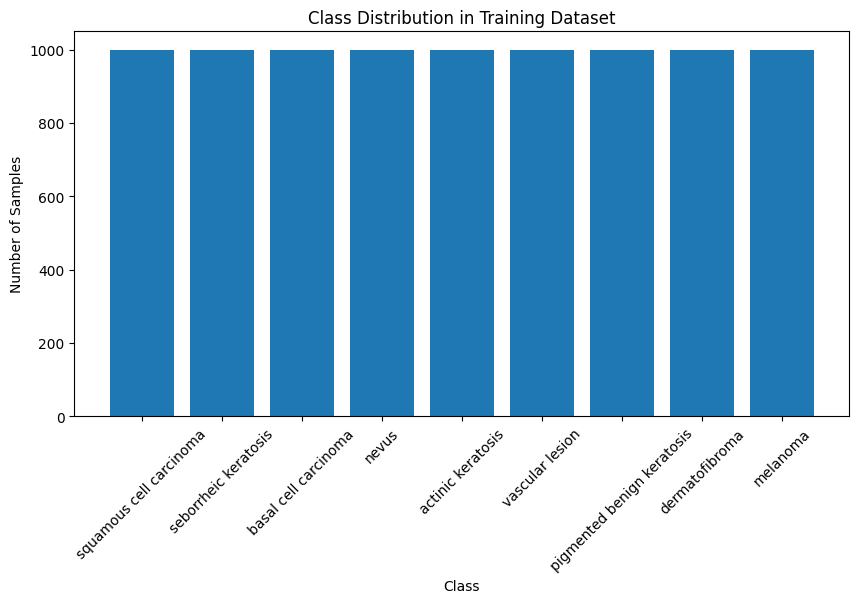

In [ ]:
# Get class distribution for training dataset
train_class_distribution = get_class_distribution(balanced_train_dir)

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()

Final Model Training

In [ ]:
# Create ImageDataGenerator for balanced train data
balanced_train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Add any additional preprocessing or augmentation techniques here
)

# Create balanced train generator
balanced_train_generator = balanced_train_datagen.flow_from_directory(
    balanced_train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Rebuild the model
model_balanced = create_model(input_shape=(180, 180, 3), num_classes=9)

# Compile the model
model_balanced.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model on balanced data
history_balanced = model_balanced.fit(balanced_train_generator,
                                      steps_per_epoch=balanced_train_generator.samples // 32,
                                      epochs=20,
                                      validation_data=validation_generator,
                                      validation_steps=validation_generator.samples // 32)

Found 9000 images belonging to 9 classes.
Epoch 1/30
281/281 [==============================] - 45s 153ms/step - loss: 1.7757 - accuracy: 0.3171 - val_loss: 1.9135 - val_accuracy: 0.3630
Epoch 2/30
281/281 [==============================] - 47s 166ms/step - loss: 1.4864 - accuracy: 0.4300 - val_loss: 1.5052 - val_accuracy: 0.4712
Epoch 3/30
281/281 [==============================] - 45s 160ms/step - loss: 1.3413 - accuracy: 0.4878 - val_loss: 1.3663 - val_accuracy: 0.5312
Epoch 4/30
281/281 [==============================] - 47s 166ms/step - loss: 1.2300 - accuracy: 0.5400 - val_loss: 1.4794 - val_accuracy: 0.4591
Epoch 5/30
281/281 [==============================] - 44s 158ms/step - loss: 1.1087 - accuracy: 0.5826 - val_loss: 1.5539 - val_accuracy: 0.5192
Epoch 6/30
281/281 [==============================] - 43s 153ms/step - loss: 0.9761 - accuracy: 0.6431 - val_loss: 1.3862 - val_accuracy: 0.5264
Epoch 7/30
281/281 [==============================] - 44s 155ms/step - loss: 0.8451 - ac

Final Model Evaluation

In [ ]:
# Evaluate the model
loss_balanced, accuracy_balanced = model_balanced.evaluate(validation_generator)
print(f"Validation Accuracy with Balanced Data: {accuracy_balanced:.2f}")

# Plot training history
plt.plot(history_balanced.history['accuracy'], label='Training Accuracy (Balanced Data)')
plt.plot(history_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()